In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("preprocessed_table.csv")
df

,Day,Month,Year,Week,Date,Store,Dept,Type,Size,Temperature,...,CPI,Unemployment,IsHoliday,Weekly_Sales,Markdown,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,5,2010-02-05,1,1,1,151315,42.31,...,211.096358,8.106000,0,24924.50,0,5502.9669,1474.233,236.8201,14827.2141,5103.4707
1,5,2,2010,5,2010-02-05,1,2,1,151315,42.31,...,211.096358,8.106000,0,50605.27,0,5502.9669,1474.233,236.8201,14827.2141,5103.4707
2,5,2,2010,5,2010-02-05,1,3,1,151315,42.31,...,211.096358,8.106000,0,13740.12,0,5502.9669,1474.233,236.8201,14827.2141,5103.4707
3,5,2,2010,5,2010-02-05,1,4,1,151315,42.31,...,211.096358,8.106000,0,39954.04,0,5502.9669,1474.233,236.8201,14827.2141,5103.4707
4,5,2,2010,5,2010-02-05,1,5,1,151315,42.31,...,211.096358,8.106000,0,32229.38,0,5502.9669,1474.233,236.8201,14827.2141,5103.4707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,28,6,2013,26,2013-06-28,45,98,2,118221,76.05,...,194.049252,8.299803,0,NaN,1,4842.2900,975.030,3.0000,2449.9700,3169.6900
551475,5,7,2013,27,2013-07-05,45,98,2,118221,77.50,...,194.118327,8.295893,0,NaN,1,9090.4800,2268.580,582.7400,5797.4700,1514.9300
551476,12,7,2013,28,2013-07-12,45,98,2,118221,79.37,...,194.187760,8.291982,0,NaN,1,3789.9400,1827.310,85.7200,744.8400,2150.3600
551477,19,7,2013,29,2013-07-19,45,98,2,118221,82.84,...,194.257397,8.288071,0,NaN,1,2961.4900,1047.070,204.1900,363.0000,1059.4600


In [3]:
df.dropna(inplace= True)

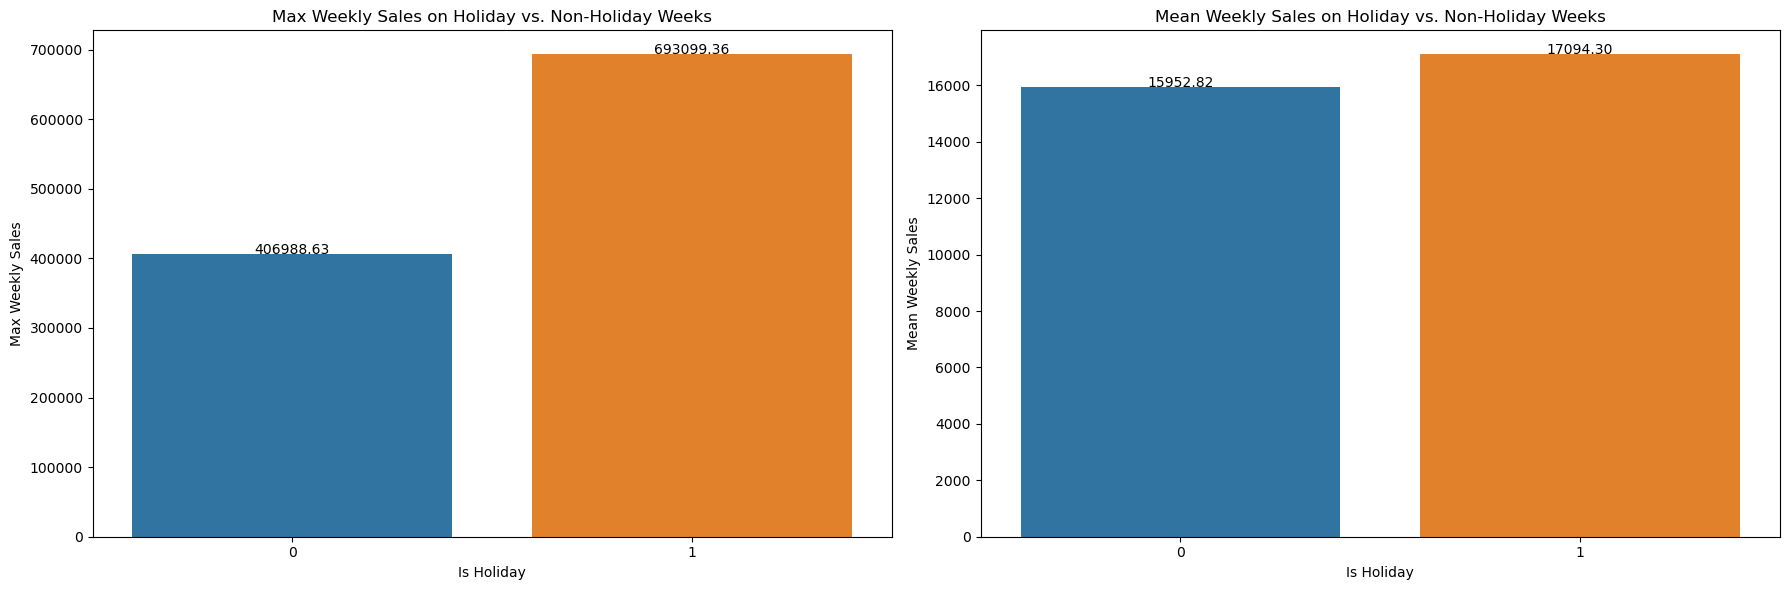

In [4]:
holiday_sales_max = df.groupby('IsHoliday')['Weekly_Sales'].max().reset_index()
holiday_sales_mean = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales_max, ax=axes[0])
axes[0].set_title('Max Weekly Sales on Holiday vs. Non-Holiday Weeks')
axes[0].set_xlabel('Is Holiday')
axes[0].set_ylabel('Max Weekly Sales')
for index, row in holiday_sales_max.iterrows():
    axes[0].text(index, row['Weekly_Sales'], f'{row["Weekly_Sales"]:.2f}', color='black', ha="center")

sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales_mean, ax=axes[1])
axes[1].set_title('Mean Weekly Sales on Holiday vs. Non-Holiday Weeks')
axes[1].set_xlabel('Is Holiday')
axes[1].set_ylabel('Mean Weekly Sales')
for index, row in holiday_sales_mean.iterrows():
    axes[1].text(index, row['Weekly_Sales'], f'{row["Weekly_Sales"]:.2f}', color='black', ha="center")

plt.tight_layout()
plt.show()

## Insights
**Higher Maximum Weekly Sales During Holidays:**

The maximum sum of weekly sales during holiday weeks over all stores are significantly higher than during non-holiday weeks, with a difference of approximately 300,000. This suggests that holidays likely drive substantial spikes in sales, indicating a strong impact of holiday events on customer spending behavior.

**Higher Average Weekly Sales in Holiday Weeks:**

The average weekly sales during holiday weeks are around 18,000, while for non-holiday weeks, it is about 15,000. This indicates that not only do holiday weeks have higher peaks, but they also consistently have higher sales on average compared to non-holiday weeks.

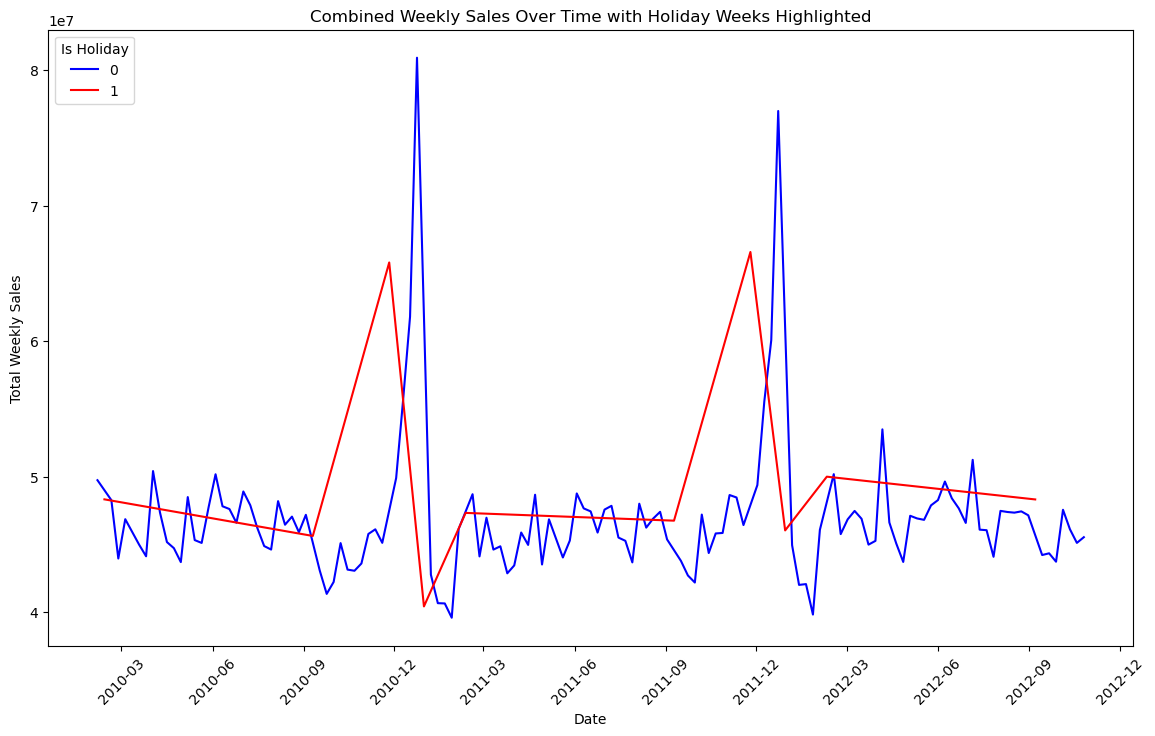

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate the data across all stores
combined_data = df.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()

# Set 'Date' as the index for the time series analysis
combined_data.set_index('Date', inplace=True)

# Plot 1: Time Series Plot with Holiday Weeks Highlighted
plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['Weekly_Sales'], hue=combined_data['IsHoliday'], palette={0: 'blue', 1: 'red'})
plt.title('Combined Weekly Sales Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend(title='Is Holiday', loc='upper left')

# Date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Show the time series plot
plt.show()

## Insights
**Spillover Effect After Holiday Weeks:**

There are certain instances where the combined weekly sales in non-holiday weeks surpass those in holiday weeks. Interestingly, these spikes typically occur in the weeks immediately following a holiday week. This suggests a potential "spillover effect", where the increased shopping momentum from a holiday week carries over into the following week. It could be driven by factors such as post-holiday sales, returns and exchanges, or delayed shopping.

**Sales Patterns Indicate Extended Shopping Periods:**

The fact that non-holiday weeks right after holiday weeks sometimes show higher sales indicates that customers may continue shopping after the main holiday period, either due to leftover promotions, returning to buy more, or restocking. Retailers could capitalize on this by extending promotions or offering special post-holiday discounts to retain customer interest.

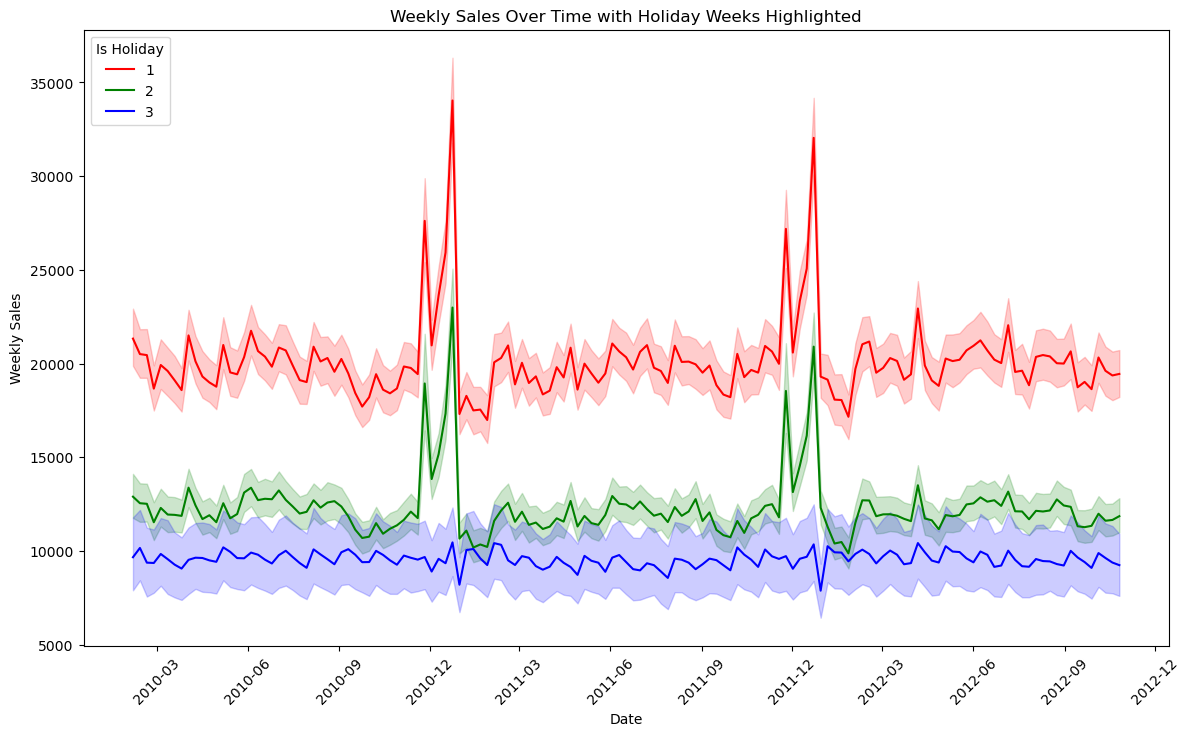

In [6]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=df, hue='Type', palette={ 1: 'red',2:'green',3: 'blue'})
plt.title('Weekly Sales Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Is Holiday', loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.show()


## Insights
**Clear Hierarchical Difference in Store Types:**

There is a distinct hierarchy in the sales performance among the store types, with Type A having the highest sales, followed by Type B, and then Type C. This hierarchy remains consistent across the entire timeline, with no instances where the sales lines for different store types intersect. This could mean that these store types are differentiated by size, location, target market, or product offerings, resulting in significant and consistent differences in sales.

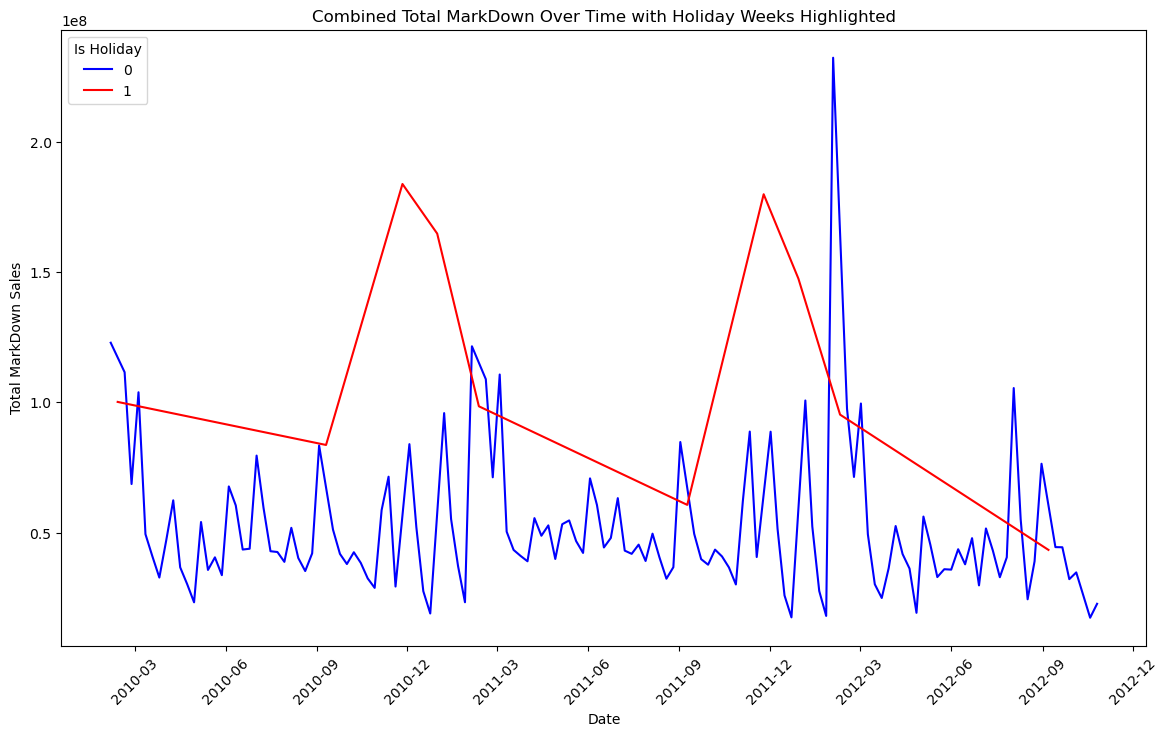

In [7]:
df["Total_MarkDown"]= df["MarkDown1"]+df["MarkDown2"]+df["MarkDown3"]+df["MarkDown4"]+df["MarkDown5"]
combined_data = df.groupby(['Date', 'IsHoliday'])['Total_MarkDown'].sum().reset_index()

# Set 'Date' as the index for the time series analysis
combined_data.set_index('Date', inplace=True)

# Plot 1: Time Series Plot with Holiday Weeks Highlighted
plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['Total_MarkDown'], hue=combined_data['IsHoliday'], palette={0: 'blue', 1: 'red'})
plt.title('Combined Total MarkDown Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel('Total MarkDown Sales')
plt.legend(title='Is Holiday', loc='upper left')

# Date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Show the time series plot
plt.show()

## Insights
**Higher Total Markdown Sales During Non-Holiday Weeks:**

The plot shows that the total markdown sales are generally higher during non-holiday weeks compared to holiday weeks. This suggests that retailers may be more aggressive with markdowns (discounts, promotions) in non-holiday periods to attract customers and drive sales during otherwise slower periods.
**Markdown Strategies Differ for Holiday and Non-Holiday Periods:**

During holiday weeks, markdowns may not need to be as extensive because customer traffic and purchasing are naturally higher due to holiday shopping trends. In contrast, non-holiday weeks may require more significant markdowns to incentivize purchases, leading to higher total markdown values.

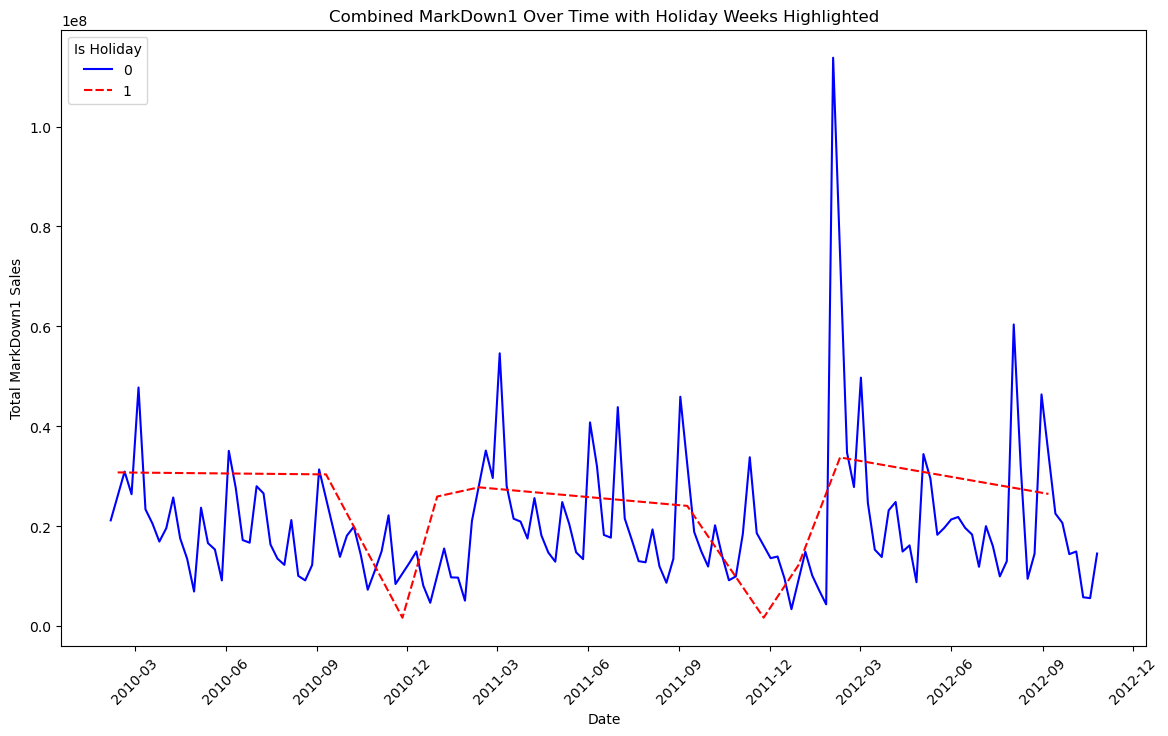

In [8]:
combined_data = df.groupby(['Date', 'IsHoliday'])['MarkDown1'].sum().reset_index()
combined_data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['MarkDown1'], hue=combined_data['IsHoliday'].astype(str), 
             palette={'0': 'blue', '1': 'red'}, style=combined_data['IsHoliday'].astype(str))
plt.title(f'Combined MarkDown1 Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel(f'Total MarkDown1 Sales')
plt.legend(title='Is Holiday', loc='upper left')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.show()

## Insights
**Higher Sales During Non-Holiday Weeks:**

Non-holiday weeks dominate in terms of total sales. This could indicate that markdowns represented by MarkDown1 are more effective or heavily used during non-holiday periods to drive baseline sales.

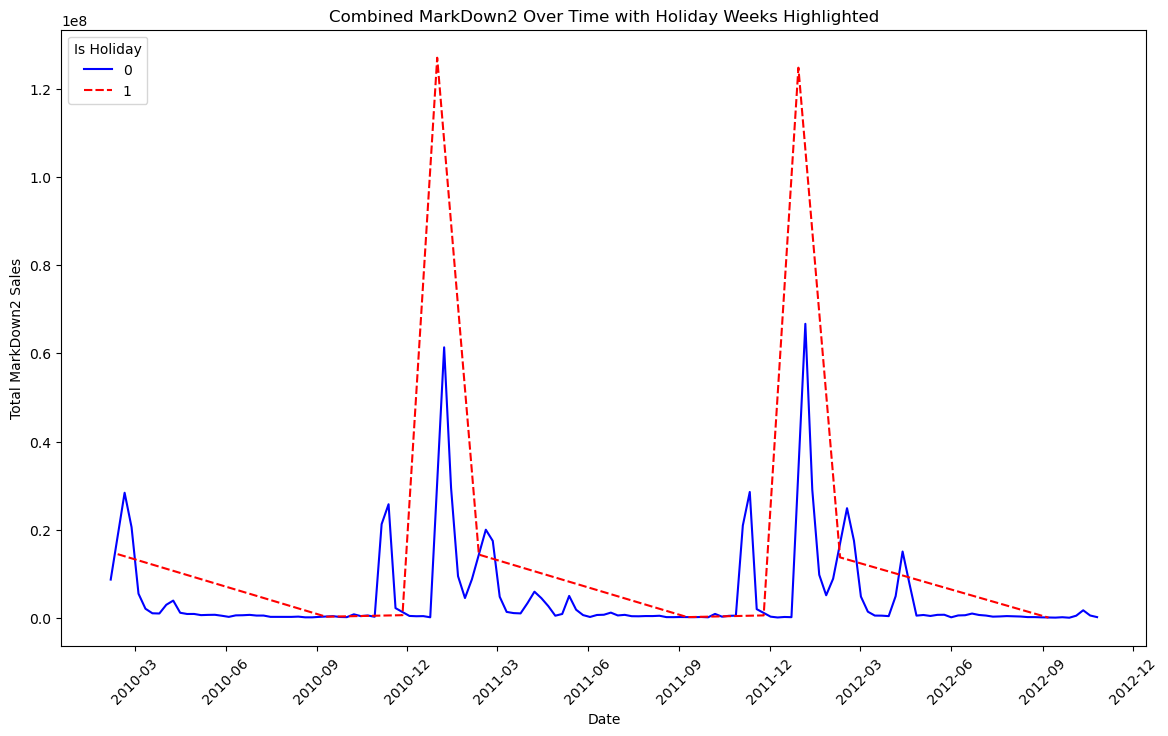

In [9]:
combined_data = df.groupby(['Date', 'IsHoliday'])['MarkDown2'].sum().reset_index()
combined_data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['MarkDown2'], hue=combined_data['IsHoliday'].astype(str), 
             palette={'0': 'blue', '1': 'red'}, style=combined_data['IsHoliday'].astype(str))
plt.title(f'Combined MarkDown2 Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel(f'Total MarkDown2 Sales')
plt.legend(title='Is Holiday', loc='upper left')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.show()

## Insights
**Higher Sales During Holiday Weeks:**

MarkDown2 shows the opposite trend, where holiday weeks have higher markdown sales. This might indicate that MarkDown2 is linked to holiday promotions or products that are more popular or in demand during holiday periods, such as seasonal goods.


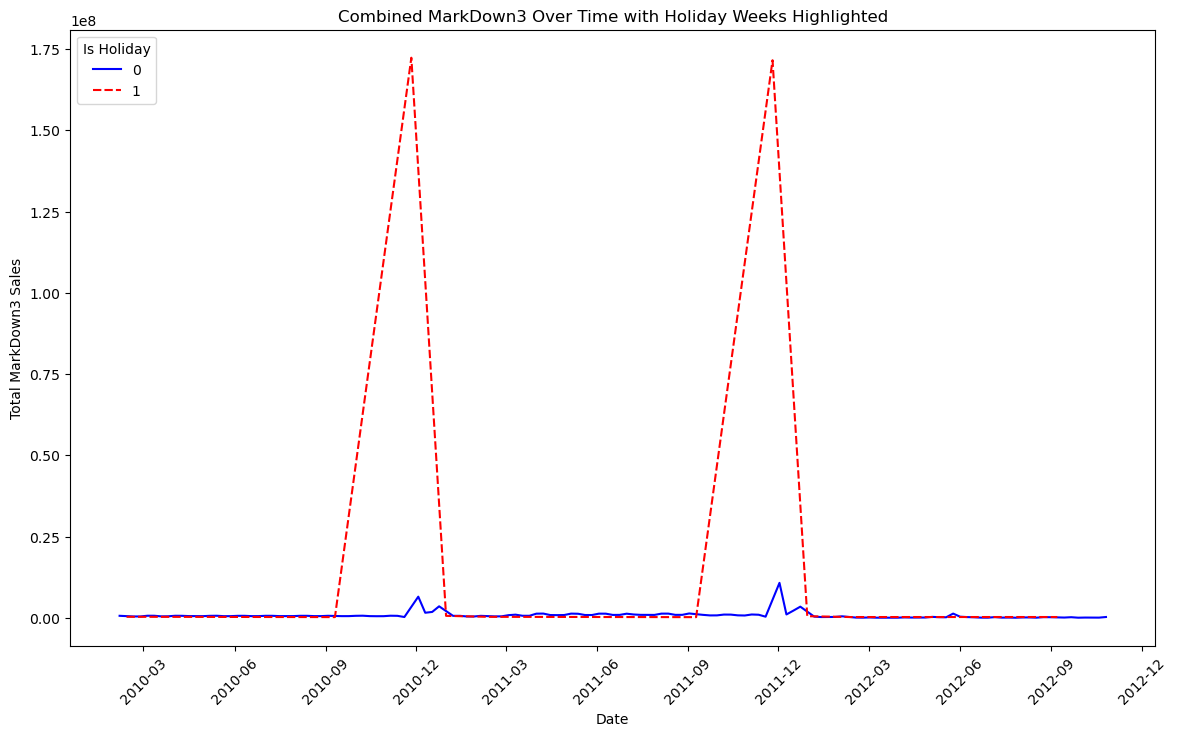

In [10]:
combined_data = df.groupby(['Date', 'IsHoliday'])['MarkDown3'].sum().reset_index()
combined_data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['MarkDown3'], hue=combined_data['IsHoliday'].astype(str), 
             palette={'0': 'blue', '1': 'red'}, style=combined_data['IsHoliday'].astype(str))
plt.title(f'Combined MarkDown3 Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel(f'Total MarkDown3 Sales')
plt.legend(title='Is Holiday', loc='upper left')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.show()

## Insights
**Significant Spike During Holiday Weeks:**

MarkDown3 shows a substantial difference between holiday and non-holiday weeks. The mean markdown sales during holiday weeks are remarkably high (11,717) compared to non-holiday weeks (247), with a peak of 141,630. This suggests that MarkDown3 is highly focused on holiday sales strategies, possibly involving major discounts on high-value or bulk items that drive significant sales volume during holidays. These dates align with Thanksgiving and Pre christmas shopping dates. So MarkDown3 is used in major holiday weeks to attract customers.

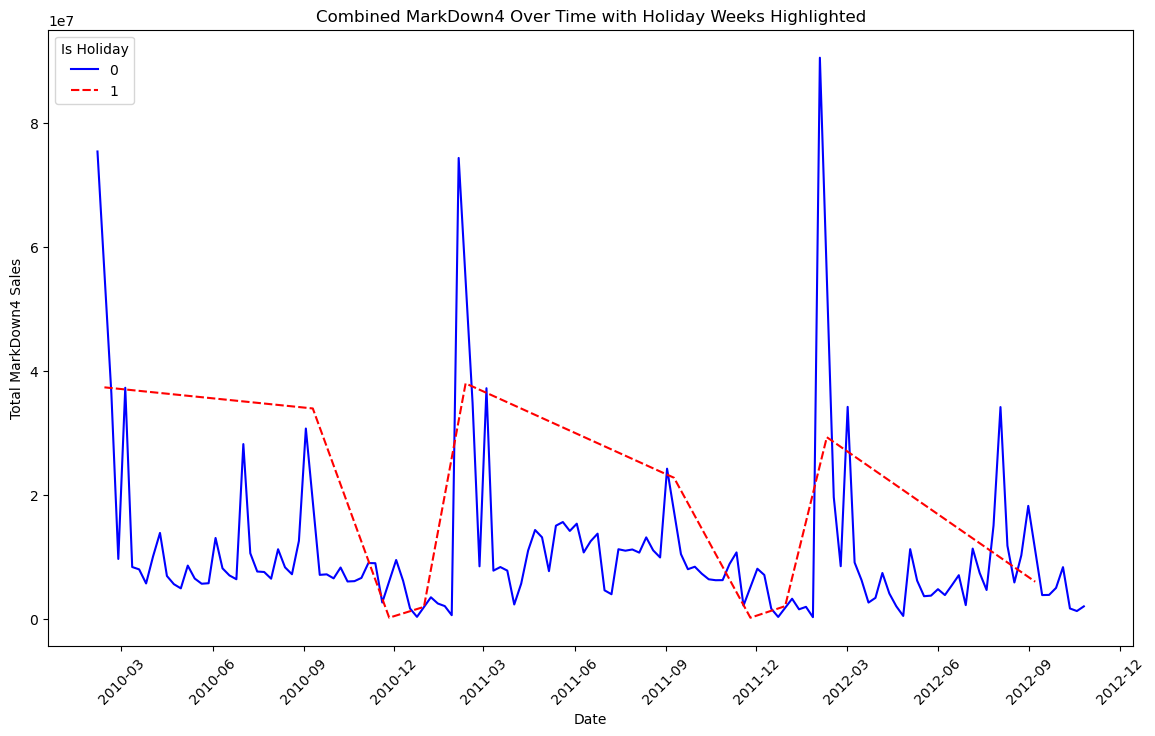

In [11]:
combined_data = df.groupby(['Date', 'IsHoliday'])['MarkDown4'].sum().reset_index()
combined_data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['MarkDown4'], hue=combined_data['IsHoliday'].astype(str), 
             palette={'0': 'blue', '1': 'red'}, style=combined_data['IsHoliday'].astype(str))
plt.title(f'Combined MarkDown4 Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel(f'Total MarkDown4 Sales')
plt.legend(title='Is Holiday', loc='upper left')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.show()

## Insights
**Peak Sales Before Holiday Weeks:**

Non-holiday weeks tend to have higher markdown sales, but there is a noticeable trend where the week before a holiday week sees peak markdown activity. This could imply pre-holiday sales or promotions designed to clear inventory or attract early holiday shoppers, indicating strategic use of markdowns just before major holiday periods.

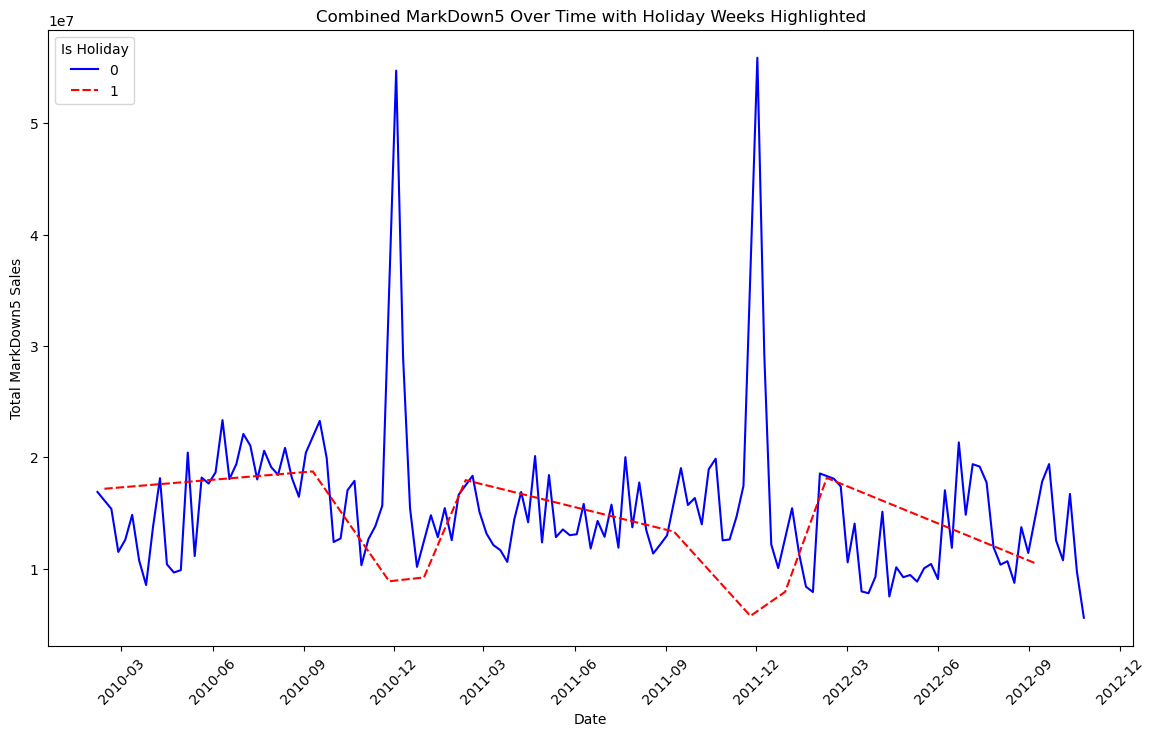

In [12]:
combined_data = df.groupby(['Date', 'IsHoliday'])['MarkDown5'].sum().reset_index()
combined_data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(x=combined_data.index, y=combined_data['MarkDown5'], hue=combined_data['IsHoliday'].astype(str), 
             palette={'0': 'blue', '1': 'red'}, style=combined_data['IsHoliday'].astype(str))
plt.title(f'Combined MarkDown5 Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel(f'Total MarkDown5 Sales')
plt.legend(title='Is Holiday', loc='upper left')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.show()

## Insights
**Higher Sales During Non-Holiday Weeks:**

Similar to MarkDown1 and MarkDown4, MarkDown5 also sees higher sales during non-holiday weeks. This suggests markdown strategies involving MarkDown5 are more effective outside of holiday periods, potentially aimed at maintaining regular customer flow and sales throughout the year.

# Comparative Analysis

***Holiday vs. Non-Holiday Markdown Effectiveness:***

Markdown1 and Markdown5 are more effective during non-holiday weeks.

Markdown2, Markdown3, and Markdown4 show higher effectiveness during holiday weeks or leading up to holidays.

***Sales Patterns:***

Holiday weeks generally show higher total sales, reflecting increased consumer spending during these periods.

Non-holiday weeks require more aggressive markdowns to drive sales.

# Strategic Recommendations

***Holiday Week Strategies***

*Tailored Promotions:* Align Markdown2, Markdown3, and Markdown4 with holiday periods for maximum impact.

*High-Value Items:* Use Markdown3 for high-value or bulk items to capitalize on holiday shopping behavior.

*Pre-Holiday Planning:* Implement pre-holiday promotions with Markdown4 to boost early sales.

***Non-Holiday Week Strategies***

*Aggressive Markdown Strategies:* Use Markdown1 and Markdown5 for regular promotions to maintain steady sales during slower periods.

*Inventory Management:* Leverage non-holiday periods for inventory clearance and promotional activities.

***Store Type Considerations***

*Customized Approaches:* Develop store-type-specific markdown strategies based on performance data.

*Optimization:* Analyze store type data to optimize markdown effectiveness and tailor promotional strategies.